# <span style="color:red">Solution</span> - Single-Stock Factor Pricing

# 1. Test on S&P 500 Stocks

### Data

Use `SAMPLING` of `weekly`.

* `../data/spx_returns_{SAMPLING}.xlsx`
* `../data/factor_pricing_data_{SAMPLING}.xlsx`

### 1.2.

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* 4-Factor: MKT, HML, RMW, UMD

Calculate the factor pricing model using the single-name stocks as the test assets.

For each pricing model, report the the annualized mean of the absolute (value of the) alphas.

### 1.2.

Create a scatter plot of the univariate (CAPM) `MKT` beta (x-axis) versus the sample mean excess return (y-axis).

### 1.3.

For each pricing model, make a scatter plot the 
* x-axis: model risk premia
* y-axis: sample risk premia

***

# <span style="color:red">1.</span>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


In [ ]:
from cmds.portfolio import performanceMetrics, tailMetrics, get_ols_metrics
from cmds.porttools import heatmap_vector, scatterplot_outliers_iqr

### <span style="color:red">1.1.</span>

In [ ]:
SAMPLING = 'weekly'

FILE_STOCKS = f'../data/spx_returns_{SAMPLING}.xlsx'
SHEET_STOCKS = 's&p500 rets'

FILE = f'../data/factor_pricing_data_{SAMPLING}.xlsx'
SHEET_FACS = 'factors (excess returns)'

if SAMPLING == 'monthly':
    FREQ = 12
elif SAMPLING == 'weekly':
    FREQ = 52
elif SAMPLING == 'daily':
    FREQ = 252

stocks_raw = pd.read_excel(FILE_STOCKS, sheet_name=SHEET_STOCKS).set_index('date')
facs_sp500_raw = pd.read_excel(FILE,sheet_name=SHEET_FACS).set_index('Date')

# need risk-free rate to make stock returns into excess returns
rf_sp500_raw = pd.read_excel(FILE,sheet_name='risk-free rate').set_index('Date')
facs_sp500_raw = pd.concat([facs_sp500_raw, rf_sp500_raw],axis=1)
# align the dates
stocks, facs_sp500 = stocks_raw.align(facs_sp500_raw,axis=0,join='inner')
# excess returns
stocks = stocks.sub(facs_sp500['RF'],axis=0)

T,N = stocks.shape
K = facs_sp500.shape[1]

In [ ]:
models = dict({
    'CAPM': ['MKT'],
    'Fama-French': ['MKT','SMB','HML'],
    '4-Factor': ['MKT','HML','RMW','UMD']
    })

In [ ]:
errors = pd.DataFrame(index=['CAPM','Fama-French','4-Factor'],columns=['mean abs alpha'],dtype=float)

tab = dict()
for model in models:
    tab[model] = get_ols_metrics(facs_sp500[models[model]],stocks,annualization=FREQ)
    errors.loc[model,'mean abs alpha'] = tab[model]['alpha'].abs().mean()

In [ ]:
display(errors.style.format('{:.2%}'))

,mean abs alpha
CAPM,5.83%
Fama-French,5.62%
4-Factor,5.42%


### <span style="color:red">1.2.</span>

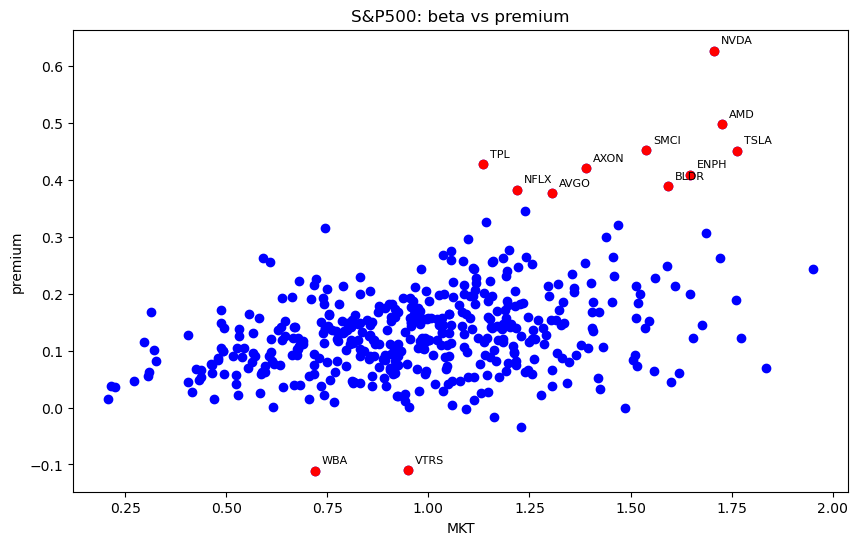

In [ ]:
comp = pd.concat([stocks.mean()*FREQ,tab['CAPM']['MKT']],axis=1).rename(columns={0:'premium'})
ax = scatterplot_outliers_iqr(comp, col_x='MKT', col_y='premium', figsize=(10,6), title='S&P500: beta vs premium', k=2)

### <span style="color:red">1.3.</span>